In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.cm as cm

from sympy import symbols, diff

**Some things you should know:**

Embed math with LaTeX: inline

dollarSign($) … dollarSign, display dollarSign … dollarSign

%matplotlib inline embeds figures in exports

## We define a simple cost function

### $$ f(x) = x^2 + x + 1 $$

In [19]:
def f(x):
    return x**2 + x + 1

### Generating sample data

In [20]:
x1= np.linspace(start= -5,stop= 5,num= 100)

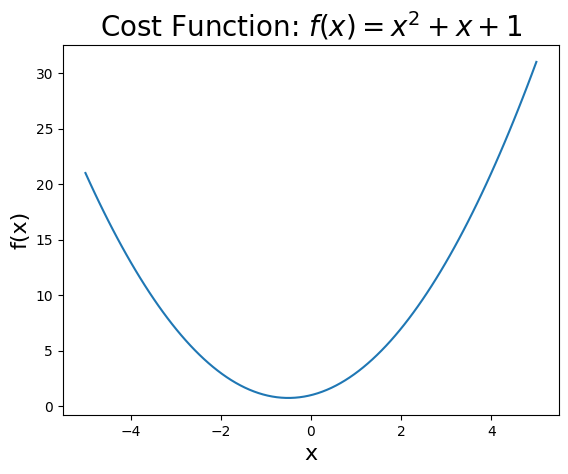

In [21]:
# Plotting the function
plt.plot(x1, f(x1))
plt.title('Cost Function: $f(x) = x^2 + x + 1$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.style.use('fivethirtyeight')
plt.show()

Goal: Find the value of x that minimizes the cost function 
$$f(x) = x^2 + x + 1$$

Key insight:

At the minimum, the slope of the function is zero

Slope is given by the derivative of the function

In [22]:
def df(x):
    return 2*x + 1

### Plotting function and derivative side-by-side

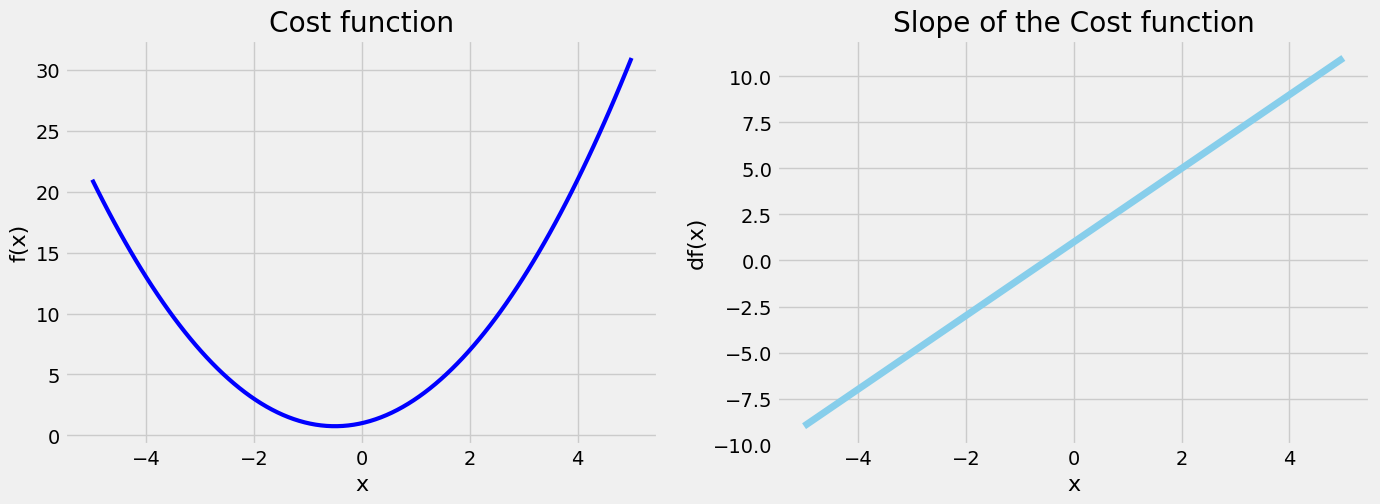

In [23]:
plt.figure(figsize=[15, 5])  # set width, height in inches

# First plot: cost function
plt.subplot(1, 2, 1)
plt.plot(x1, f(x1), color='blue', linewidth=3)
plt.title('Cost function')
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)


# Second plot: derivative
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(x1, df(x1), color='skyblue', linewidth=5)
plt.title('Slope of the Cost function')
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.show()

To stack plots vertically instead of side by side:

Change subplot to subplot(2, 1, 1) and subplot(2, 1, 2)

Adjust figure size to something like [5, 15] for better appearance

## Gradient Descent Algorithm

In [24]:
new_x = 2
previous_x = 0
step_multiplier = 0.1
precision = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for i in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', i)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 59
Local minimum occurs at: -0.49999616876114783
Slope or df(x) value at this point is: 7.66247770433992e-06
f(x) value or cost at this point is: 0.7500000000146784


In [25]:
#

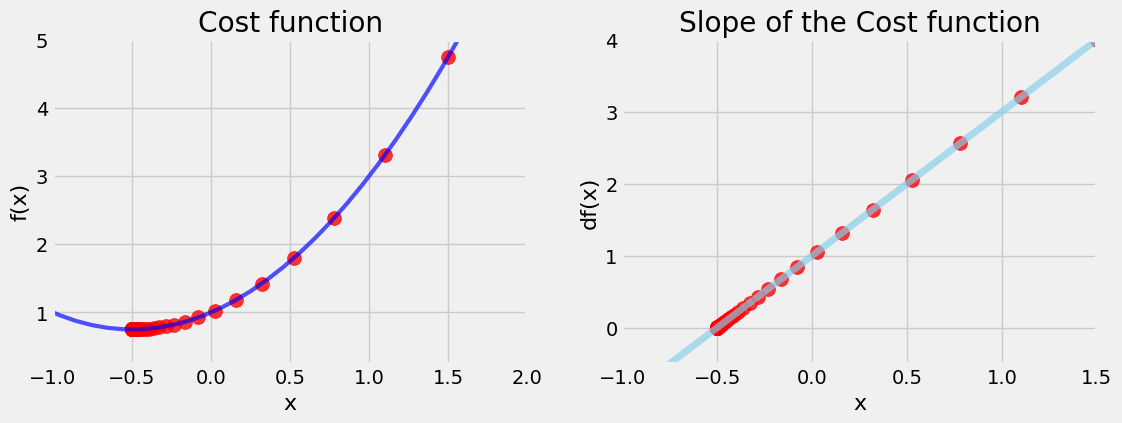

In [26]:
plt.figure(figsize=[12, 4])  # set width, height in inches

# First plot: cost function
plt.subplot(1, 2, 1)
plt.plot(x1, f(x1), color='blue', linewidth=3, alpha=0.67)
plt.scatter(x_list, f(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost function')
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.xlim(-1, 2)
plt.ylim(0.25, 5)


# Second plot: derivative
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(x1, df(x1), color='skyblue', linewidth=5, alpha=0.67)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of the Cost function')
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim(-1, 1.5)
plt.ylim(-0.5, 4)

plt.show()

## Example 2: Multiple Minima & Initial Guess
## $$g(x) = x^4 - 4x^2 + 5$$

In [27]:
# generating data
x2= np.linspace(start=-2, stop=2, num=500)

In [28]:
# defining the function & its derivative
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

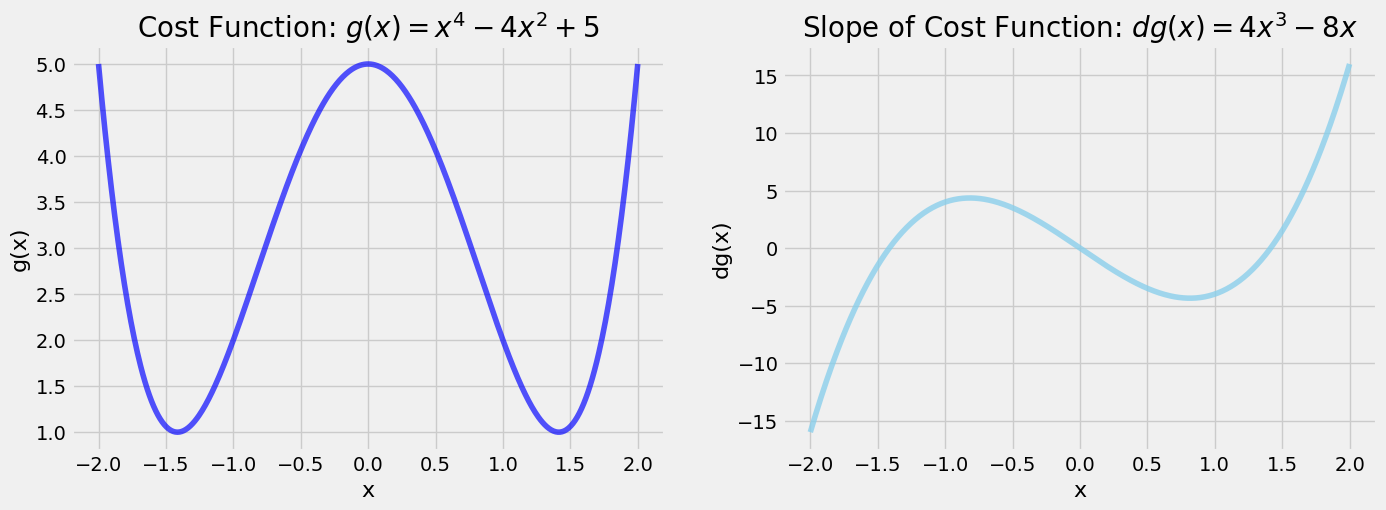

In [29]:
plt.figure(figsize=[15, 5])  # set width, height in inches
plt.subplot(1, 2, 1)
plt.plot(x2, g(x2), color='blue', linewidth=4, alpha=0.67)
plt.title('Cost Function: $g(x) = x^4 - 4x^2 + 5$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(x2, dg(x2), color='skyblue', linewidth=4, alpha=0.77)
plt.title('Slope of Cost Function: $dg(x) = 4x^3 - 8x$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.show()

Observation: Two minima (≈ ±1.4), one maximum at x = 0; zeros of dg(x) correspond exactly.

# Restructuring Gradient Descent code into a Function

In [30]:
def gradient_descent(slope_func, initial_guess, step_multiplier= 0.01,
                     precision= 0.00001, max_iterations= 500):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [slope_func(new_x)]

    for i in range(max_iterations):
        previous_x = new_x
        gradient = slope_func(previous_x)
        new_x = previous_x - step_multiplier * gradient
    
        step_size = abs(new_x - previous_x)
        # print(step_size)
        
        x_list.append(new_x)
        slope_list.append(slope_func(new_x))
        
        if step_size < precision:
            break  

    return new_x, x_list, slope_list


In [31]:
# calling the function
result, x_list, slope_list= gradient_descent(dg, 0.5)
print('Local minimum occurs at:', result)
print('Slope or dg(x) value at this point is:', dg(result))
print('g(x) value or cost at this point is:', g(result))
print("Number of iterations:", len(x_list)-1)

Local minimum occurs at: 1.4141668991848309
Slope or dg(x) value at this point is: -0.0007465740600292037
g(x) value or cost at this point is: 1.0000000174190506
Number of iterations: 68


### Visualizing gradient‐descent paths on g(x)

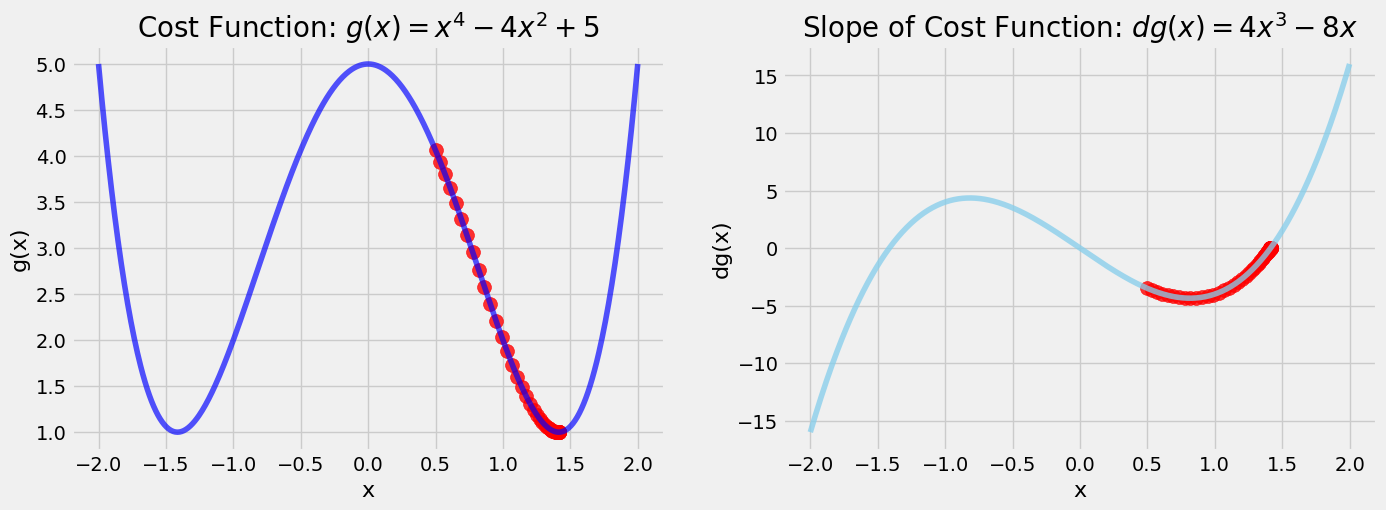

In [32]:
plt.figure(figsize=[15, 5])  # set width, height in inches
plt.subplot(1, 2, 1)

plt.plot(x2, g(x2), color='blue', linewidth=4, alpha=0.67)
plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost Function: $g(x) = x^4 - 4x^2 + 5$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.subplot(1, 2, 2)

plt.plot(x2, dg(x2), color='skyblue', linewidth=4, alpha=0.77)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of Cost Function: $dg(x) = 4x^3 - 8x$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.show()

In [33]:
# calling the function
result, x_list, slope_list= gradient_descent(dg, 0)
print('Local minimum occurs at:', result)
print('Slope or dg(x) value at this point is:', dg(result))
print('g(x) value or cost at this point is:', g(result))
print("Number of iterations:", len(x_list)-1)

Local minimum occurs at: 0.0
Slope or dg(x) value at this point is: 0.0
g(x) value or cost at this point is: 5.0
Number of iterations: 1


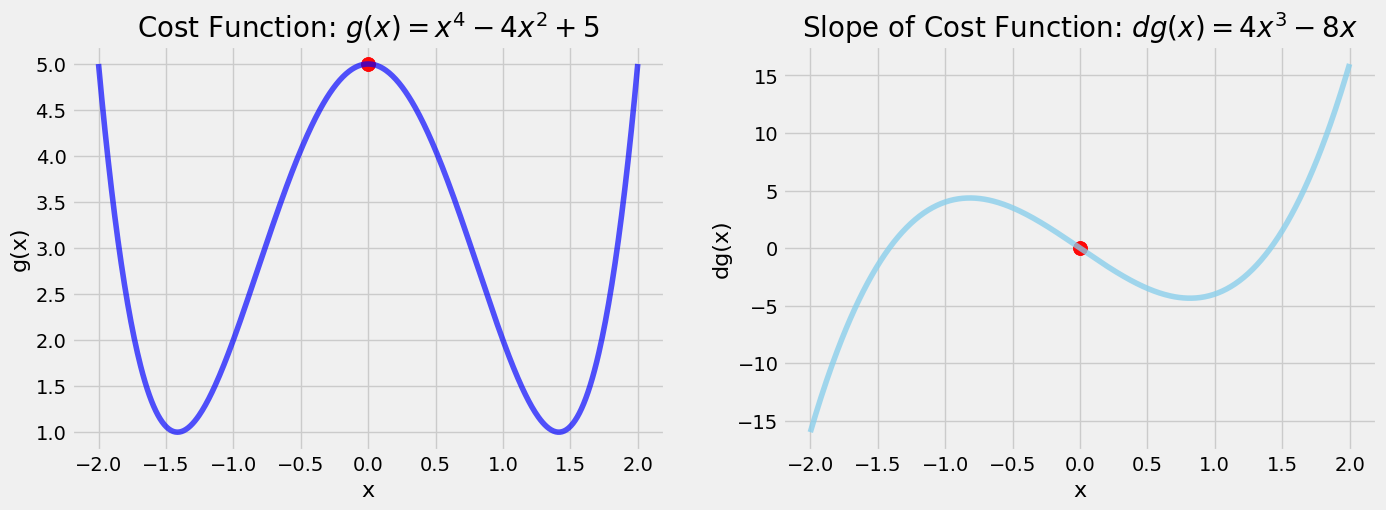

In [34]:
plt.figure(figsize=[15, 5])  # set width, height in inches

plt.subplot(1, 2, 1)

plt.plot(x2, g(x2), color='blue', linewidth=4, alpha=0.67)
plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost Function: $g(x) = x^4 - 4x^2 + 5$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.subplot(1, 2, 2)

plt.plot(x2, dg(x2), color='skyblue', linewidth=4, alpha=0.77)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of Cost Function: $dg(x) = 4x^3 - 8x$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.show()

**Sensitivity to start**

Start = 0.1 → minimum at +1.4

Start = 2 → same +1.4

Start = –1.8 or –0.1 → minimum at –1.4

## Start = 0 → stuck at local maximum x = 0 (dg(0)=0)

- Discussion

Local vs. global minima in non-convex landscapes

Remedies: multiple random restarts; alternative algorithms (e.g., stochastic GD)



**Key Terms / Questions**

Cost Function / Loss Function: 
$$ g(x)= x^4 - 4x^2 + 5 $$

measures how well a model fits the data → used to evaluate model performance

Derivative / Gradient: 
gives slope → used for update direction

Subplots (plt.subplot) & Figure sizing (plt.figure(figsize=…))

Passing Functions as arguments in Python

Default Arguments vs. Required Parameters

Multiple Return Values from a function

Gradient Descent Sensitivity: dependence on initial guess; local vs. global minima

Mitigations: random restarts, stochastic gradient descent, other optimization methods

**Summary**

In this lesson we extended gradient descent to a more complex cost function
$$g(x)=x^4−4x^2+5$$

that has two minima and one maximum. We refactored our algorithm into a versatile Python function—accepting another function as input, providing default parameters, and returning multiple outputs. Visualizing different starting points revealed the method’s sensitivity: depending on the initial guess, gradient descent can converge to either local minimum or get stuck at a local maximum. Finally, we discussed strategies such as multiple random restarts and alternative algorithms (e.g., stochastic gradient descent) to overcome these limitations.

# Example 3: Divergence & Overflow
## $$h(x)= x^5 - 2x^4 + 2$$

In [35]:
# generating data
x3= np.linspace(start=-3, stop=3, num=1000)

# defining the function & its derivative
def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

In [36]:
# calling the function
result, x_list, slope_list= gradient_descent(dh, 0.4)
print('Local minimum occurs at:', result)
print('Slope or dg(x) value at this point is:', dh(result))
print('g(x) value or cost at this point is:', h(result))
print("Number of iterations:", len(x_list)-1)

Local minimum occurs at: 1.5999669340201357
Slope or dg(x) value at this point is: -0.0006771492834971582
g(x) value or cost at this point is: -0.6214399888044664
Number of iterations: 106


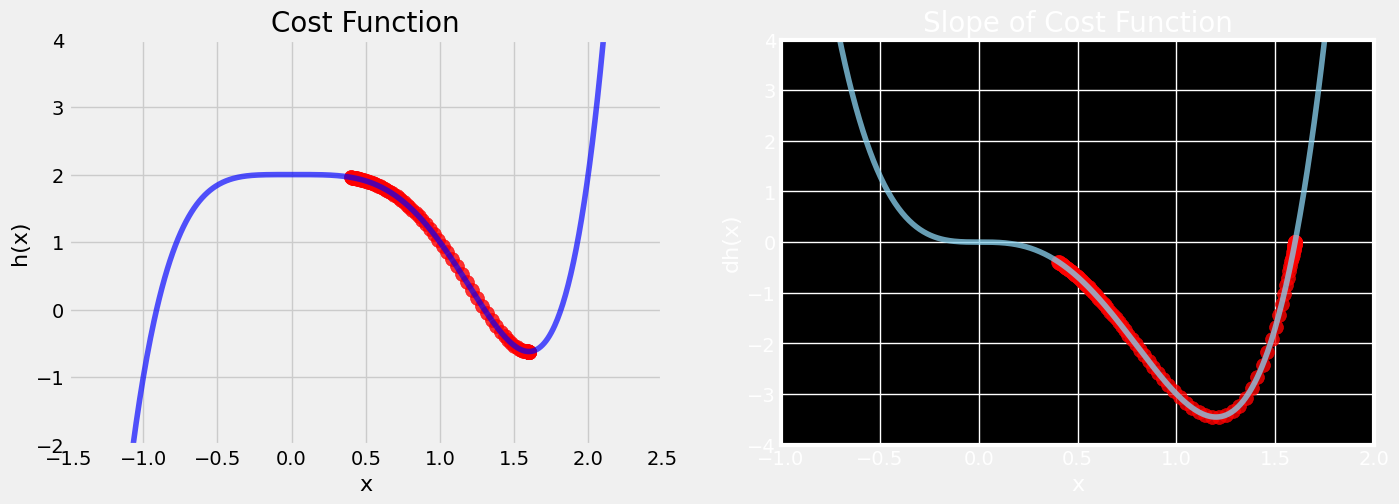

In [37]:
plt.figure(figsize=[15, 5])  # set width, height in inches
plt.subplot(1, 2, 1)
plt.style.use('dark_background')

plt.plot(x3, h(x3), color='blue', linewidth=4, alpha=0.67)
plt.scatter(x_list, h(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost Function', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.xlim(-1.5, 2.5)
plt.ylim(-2, 4)

plt.subplot(1, 2, 2)

plt.plot(x3, dh(x3), color='skyblue', linewidth=4, alpha=0.77)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of Cost Function', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.xlim(-1, 2)
plt.ylim(-4, 4)

plt.show()

- Gradient descent behavior

Starting guess = +0.2 → converges to a local minimum at ≈ 1.6 in ~117 steps

Starting guess = –0.2 → OverflowError (“float overflow”)

Why? Descends down the unbounded left side → step sizes grow exponentially → values exceed Python’s max float (~1.8 × 10³⁰⁸) → crash.

- Controlling iterations

Add max_iter parameter with default (e.g. 300) → use for _ in range(max_iter)

Experiment with smaller max_iter to watch the descent before overflow

In [38]:
# calling the function
result, x_list, slope_list= gradient_descent(slope_func= dh,initial_guess= -0.2,
                                             max_iterations= 133)
print('Local minimum occurs at:', result)
print('Slope or dg(x) value at this point is:', dh(result))
print('g(x) value or cost at this point is:', h(result))
print("Number of iterations:", len(x_list)-1)

Local minimum occurs at: -18.03916285322386
Slope or dg(x) value at this point is: 576424.0780800029
g(x) value or cost at this point is: -2121996.5941754677
Number of iterations: 133


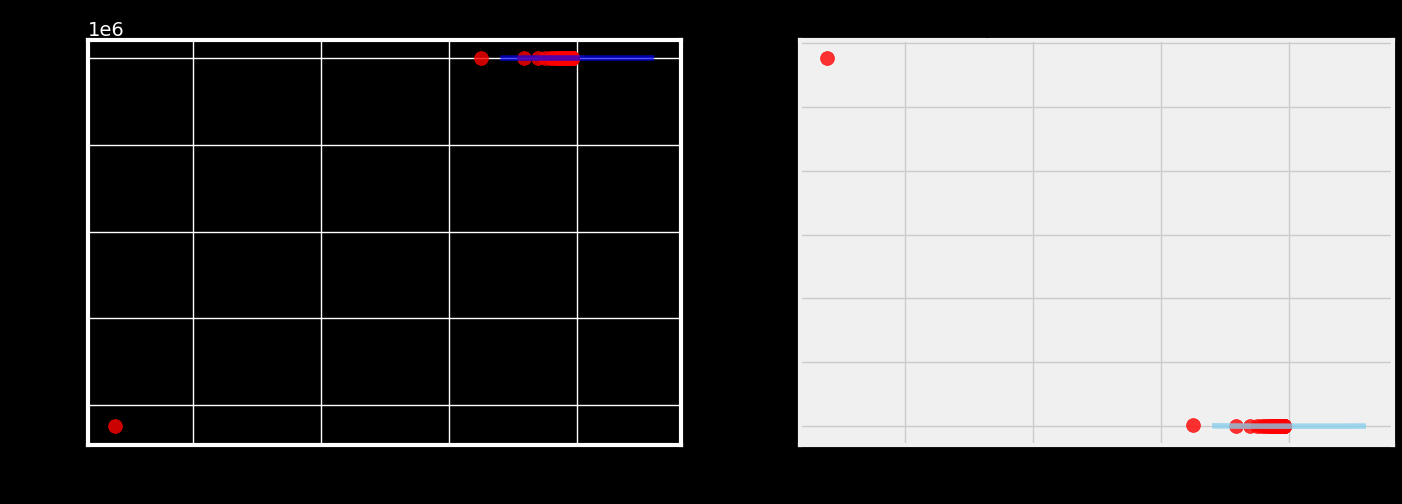

In [39]:
plt.figure(figsize=[15, 5])  # set width, height in inches
plt.subplot(1, 2, 1)
plt.style.use('fivethirtyeight')

plt.plot(x3, h(x3), color='blue', linewidth=4, alpha=0.67)
plt.scatter(x_list, h(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost Function', fontsize=20, c='black')
plt.xlabel('x', fontsize=16, c='black')
plt.ylabel('h(x)', fontsize=16, c='black')
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

plt.subplot(1, 2, 2)

plt.plot(x3, dh(x3), color='skyblue', linewidth=4, alpha=0.77)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of Cost Function', fontsize=20, c='black')
plt.xlabel('x', fontsize=16, c='black')
plt.ylabel('dh(x)', fontsize=16, c='black')
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

plt.show()

## Inspecting Python’s float limits

In [40]:
import sys
sys.float_info.max   # ~1.79e308

1.7976931348623157e+308

**Key Terms / Questions**

Divergence: gradient descent steps grow instead of shrink

OverflowError (Exception): numeric result exceeds Python’s float limits

sys.float_info.max: machine-specific maximum float

max_iter parameter: caps number of iterations to avoid infinite/diverging loops

- **Summary**

In this lesson we explored a third cost function 
$$ℎ(𝑥)=𝑥^5−2𝑥^4+2$$
that diverges for certain starting points. Starting at +0.2 converged to a local minimum, but at –0.2 the gradient steps blew past Python’s maximum float (~1.8 × 10³⁰⁸), triggering an overflow error. We modified the descent routine to accept a max_iter limit, inspected Python’s float range via sys.float_info.max, and demonstrated how to cap iterations to observe partial progress without crashing. Finally, we dug into Python tuples—packing return values into a tuple, immutability, single-element syntax, and unpacking—to clarify how our descent function returns and callers unpack its multiple outputs.

# The Learning Rate

- Role of the learning rate (multiplier) :

In gradient descent:
multiplier scales the step size alongside the gradient.
Large multiplier → larger jumps; small multiplier → smaller, slower steps

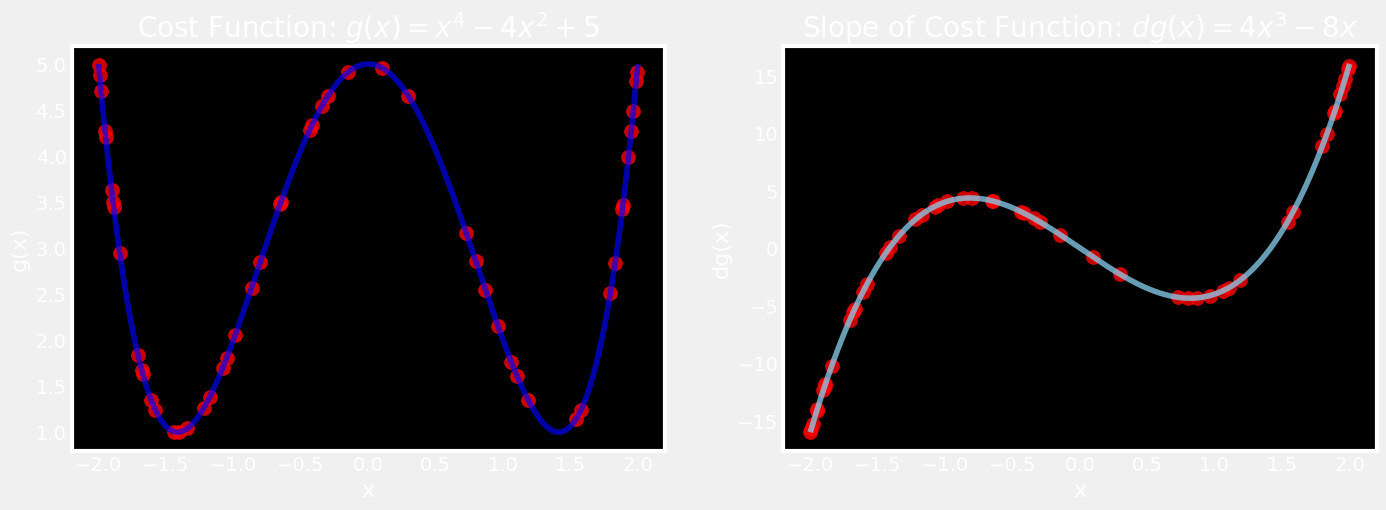

Number of iterations: 50


In [41]:
result, x_list, slope_list= gradient_descent(slope_func= dg, initial_guess= 0.1,
                                             step_multiplier= 0.25, max_iterations= 50)

plt.figure(figsize=[15, 5])  # set width, height in inches
plt.style.use('dark_background')
plt.subplot(1, 2, 1)

plt.plot(x2, g(x2), color='blue', linewidth=4, alpha=0.67)
plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost Function: $g(x) = x^4 - 4x^2 + 5$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.grid(False)

plt.subplot(1, 2, 2)

plt.plot(x2, dg(x2), color='skyblue', linewidth=4, alpha=0.77)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of Cost Function: $dg(x) = 4x^3 - 8x$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid(False)

plt.show()

print("Number of iterations:", len(x_list)-1)

- Experimenting with learning rate

On 
$$𝑔(𝑥)=𝑥^4−4𝑥^2+5$$
start at 𝑥 = 1.9, precision=0.001

Default multiplier=0.02, max_iter=∞ (or large) → converges in ~14 steps

Small
𝛼 (e.g. 0.005) → very slow convergence

Moderate 
𝛼 (e.g. 0.25) → oscillations (“bounces”) around minimum

Too large 
𝛼 (e.g. ≥0.3) → divergence → overflow errors

- Visualization of cost vs. iterations

Plot cost 
𝑔(𝑥) against iteration count for multiple 𝛼 on same axes

Compare “low,” “mid,” “high,” and “insane” learning rates

Shows:

Higher 
𝛼 → faster initial drop, but only up to a threshold

Excessive 
𝛼 → no convergence, cost oscillates or overflows

- For loop vs. while loop

For loop requires explicit max_iter → safe guard against infinite loops

While loop (e.g. while step_size > precision:) risks non-terminating loops when cost diverges

- Adaptive learning-rate strategies (preview)

Learning-rate schedules: decrease 𝛼 over time

Bold Driver heuristic:

If cost decreases → 𝛼 → α×1.05

If cost increases → revert last step & 
𝛼 → 𝛼×0.5

**Key Terms / Questions**

Learning rate (𝛼 / multiplier)

Convergence vs. divergence in gradient descent

OverflowError: numeric result exceeds Python’s float max

For loops vs. while loops: forced iteration cap vs. potential infinite loops

Cost vs. iterations plot: tool for tuning 𝛼

Adaptive learning-rate methods (schedules, Bold Driver)


**Summary**

The learning rate (𝛼) critically controls gradient-descent step sizes: small 𝛼 yields slow but stable convergence; large 𝛼 can speed up progress but risk oscillation or outright divergence (overflow errors). Visualizing cost vs. iteration for several 𝛼 on the same plot quickly reveals effective vs. problematic rates. Using a for loop with a max_iter guard prevents infinite loops, unlike a naive while loop. In practice, one can employ adaptive schemes—like decaying schedules or the “Bold Driver” rule—to adjust 𝛼 dynamically, balancing convergence speed and stability.

# Example 4: Multiple Parameters

## Defining a 2-variable cost function
### $$ f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1} $$

In [42]:
def f(x, y):
    r= 3**(-x**2 - y**2)
    return 1/(r + 1)

In [43]:
# Generating a 2D grid of inputs

x4 = np.linspace(-2, 2, 200)
y4 = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x4, y4)    # → X, Y now 200×200 arrays
Z = f(X, Y)                   # element-wise apply f to grid

# A MISTAKE

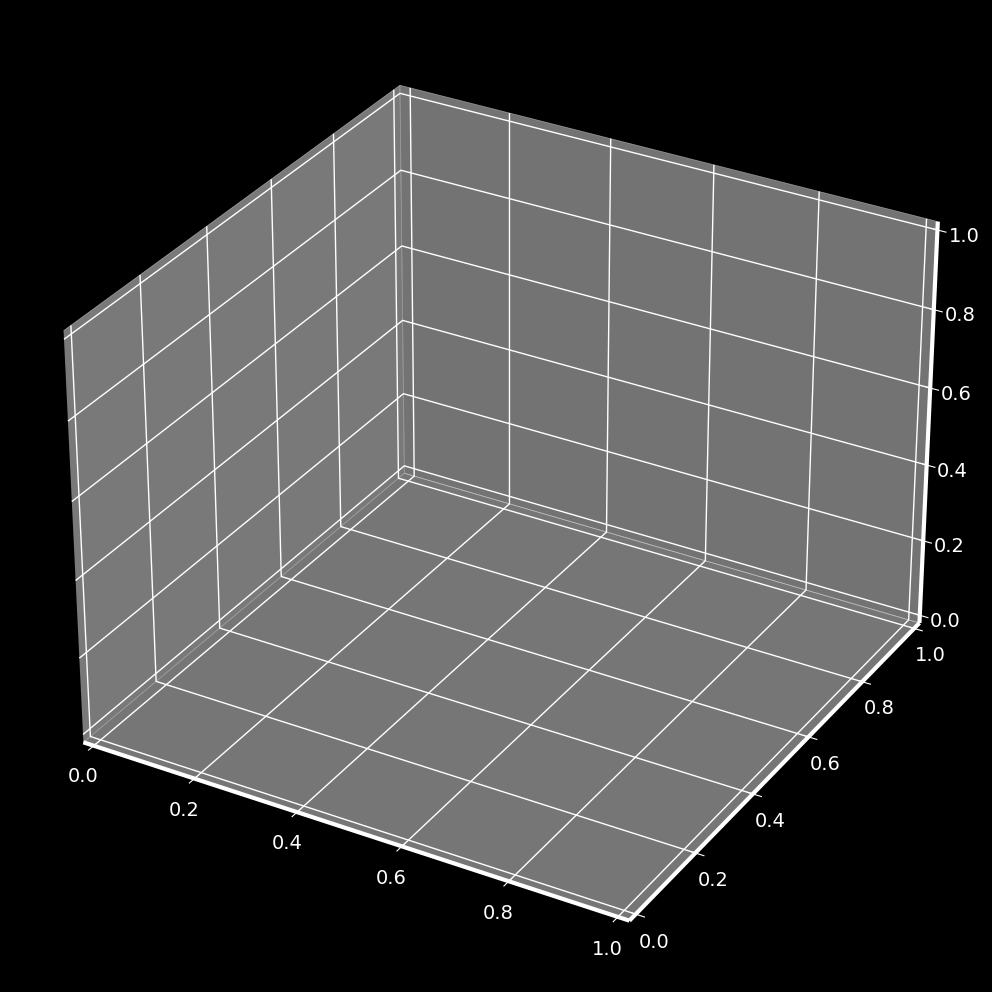

In [46]:
# Setting up a 3D figure & axes

fig = plt.figure(figsize=(16, 12))
ax  = fig.add_subplot(111, projection='3d')    # “get current axes” in 3D

In [47]:
# Plotting the surface

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.4)    #cm= colormap

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) — Cost', fontsize=20)

plt.show()

**Key Terms / Questions**

LaTeX in Markdown: \$…\$ (inline) vs. \$$…\$$ (display)

np.meshgrid: builds 2D arrays from 1D coordinate vectors

Figure vs. Axes: top-level container (fig) vs. plotting region (ax)

3D plotting: Axes3D, plot_surface

Colormap (cmap) and alpha (transparency)



**Summary**

By combining NumPy’s linspace and meshgrid to produce 2D input arrays, with Matplotlib’s 3D API (mpl_toolkits.mplot3d.Axes3D), you can visualize functions of two variables as surfaces in three dimensions. The process involves: creating a figure, retrieving its 3D axes, plotting via ax.plot_surface(X, Y, Z), and then enhancing readability with colormaps (cmap=cm.coolwarm) and labels. Different cmap choices (e.g. plasma, hot, winter) let you highlight high- and low-cost regions through color, while alpha adds depth by making the plane translucent.

## Why partial derivatives?

A 2-variable cost surface 
𝑓(x,𝑦) has a “slope” in each direction (x and y).

You need 
∂𝑓/∂𝑥 and ∂f/∂y to guide gradient descent in 2D.

In [50]:
# Using SymPy for symbolic math

a, b = symbols('x, y')      # treat a≡x, b≡y symbolically
def f(u, v):               # define f(u,v) ≡ 1/(3^{−u²−v²} + 1)
    r = 3**(-u**2 - v**2)
    return 1/(r + 1)

In [51]:
# Computing partial derivatives

# ∂f/∂x  (holding y constant):
fx = diff(f(a, b), a)
# ∂f/∂y  (holding x constant):
fy = diff(f(a, b), b)


In [52]:
# Evaluating the partial derivatives at a point

# Substitute a=1.8, b=1.0 → numeric f:
value = f(a, b).evalf(subs={a:1.8, b:1.0})
# Numeric partial ∂f/∂x at (1.8,1.0):
slope_x = fx.evalf(subs={a:1.8, b:1.0})


**Key Terms / Questions**

Partial derivative: 
∂f/∂x  vs. ∂f∂y
​

Symbolic computation: manipulating expressions algebraically (SymPy)

SymPy: Python library for symbolic math (symbols, diff, evalf)

symbols('x, y'): declares symbolic variables x and y

diff(expr, var): takes derivative of expr with respect to var

evalf(subs={…}): numerically evaluates a symbolic expression with given substitutions

Python dict: {key: value} pairs for subs=

**Summary**

To handle 2-D gradient descent, you must compute ∂f/∂x and ∂f/∂y. SymPy makes this effortless: declare your symbols, define f(a,b) symbolically, use diff to get the partials, then call evalf(subs={…}) with a Python dictionary to plug in any (x,y) point and obtain numeric slopes or cost values—all directly within your Jupyter notebook.